## Data Mining Final Project
### Pattern Mining and Predictive analytics using the Diabetes dataset
#### Jude Ogbuibe & Pooja Bansal
##### May 6, 2018

Below is the summary of the process we undertook as well as the code used to generate our analysis.

#### Step 1: Prelimnary Data Cleaning and Transformation

These processes were carried out with the aim of:
* Dealing with missing information
* Encode data in the required form to aid our analysis

In [1]:
## Load required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Load data into dataframe

dataset = pd.read_csv('diabetic_data.csv')

In [3]:
# Replace '?' with NAN and check for nulls

dataset.replace('?', np.nan, inplace = True)
dataset.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [4]:
## Exclude Weight, Medical Specialty and Paycode due to missing values

dataset.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1, inplace =True)

In [5]:
## Encode Missing values in Race with Unknown

dataset['race'].fillna('Unknown', inplace = True)

In [6]:
## Encode Diagnosis details based on details provided in Paper

import math
def getencoding(value):
    '''
    0: Diabetese
    1: Circulatory
    2: Respiratory
    3: Digestive
    4: Injury
    5: Muskuloskeletal
    6: Genitourinary
    7: Neoplasms
    8: Others
    '''
    #result = 8
    if (str.isalpha(str(value)[0])):
        return 8
    else:
        if math.floor(float(value)) == 250:
            return 0
        if ((float(value)) >= 390 and float(value) <= 459) or float(value) == 785:
            return 1
        if (float(value) >= 460 and float(value) <= 519) or float(value) == 786:
            return 2
        if (float(value) >= 520 and float(value) <= 579) or float(value) == 787:
            return 3
        if (float(value) >= 800 and float(value) <= 999):
            return 4
        if (float(value) >= 710 and float(value) <= 739):
            return 5
        if (float(value) >= 580 and float(value) <= 629) or float(value) == 788:
            return 6
        if (float(value) >= 140 and float(value) <= 239) or (float(value) >= 790 and float(value) <= 799) \
        or (float(value) >= 240 and float(value) <= 249) or (float(value) >= 251 and float(value) <= 271) \
        or (float(value) >= 680 and float(value) <= 709) or (float(value) >= 1 and float(value) <= 139) \
        or (float(value) >= 780 and float(value) <= 782):
            return 7
        if (float(value) >= 290 and float(value) <= 319) or (float(value) >= 280 and float(value) <= 289)\
        or (float(value) >= 320 and float(value) <= 389) or (float(value) >= 630 and float(value) <= 679) \
        or (float(value) >= 740 and float(value) <= 759):
            return 8
        else:
            return 8
        

dataset['diag_1'] = dataset['diag_1'].apply(getencoding)
dataset['diag_2'] = dataset['diag_2'].apply(getencoding)
dataset['diag_3'] = dataset['diag_3'].apply(getencoding)

In [7]:
## Drop duplicates based to ensure each entry corresponds to a single patient

dataset.drop_duplicates('patient_nbr', inplace = True)

In [8]:
## remove patients who expired to prevent
dataset =  dataset[(dataset['discharge_disposition_id'] != 19) | (dataset['discharge_disposition_id'] != 11) | \
                   (dataset['discharge_disposition_id'] != 21) | (dataset['discharge_disposition_id'] != 20)]

In [9]:
## Further exclude Non-significant attributes encounter_id

dataset.drop(['encounter_id', 'patient_nbr'], axis = 1, inplace = True)

In [10]:
## Review attribute datatypes

dataset[['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3']] = dataset[['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3']].astype(object, inplace = True)

In [11]:
## Space after prelimnary data cleaning and transformation
dataset.shape

(71518, 45)

#### Step 2: Exploratory data analysis and data description

Here we attempt to get more insight into our data by understanding the not obvious statistical elements.

In [12]:
## Describe The numerical attributes of the dataset

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,71518.0,4.289130,2.949210,1.0,2.0,3.0,6.0,14.0
num_lab_procedures,71518.0,43.075478,19.952338,1.0,31.0,44.0,57.0,132.0
num_procedures,71518.0,1.430577,1.759864,0.0,0.0,1.0,2.0,6.0
num_medications,71518.0,15.705025,8.311163,1.0,10.0,14.0,20.0,81.0
number_outpatient,71518.0,0.280069,1.068957,0.0,0.0,0.0,0.0,42.0
number_emergency,71518.0,0.103540,0.509187,0.0,0.0,0.0,0.0,42.0
number_inpatient,71518.0,0.177829,0.603790,0.0,0.0,0.0,0.0,12.0
number_diagnoses,71518.0,7.245700,1.994674,1.0,6.0,8.0,9.0,16.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011A75048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010633080>]], dtype=object)

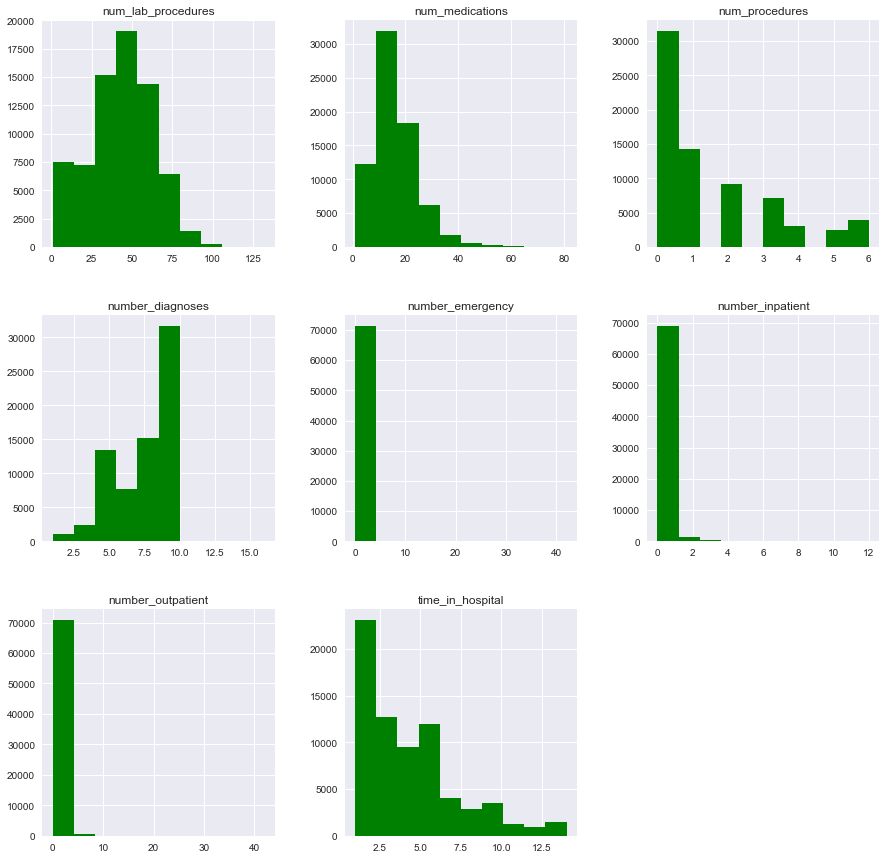

In [13]:
## Veiw the distributions 

dataset.select_dtypes(include = [np.number]).hist(figsize = [15, 15], bins = 10, color = 'green')

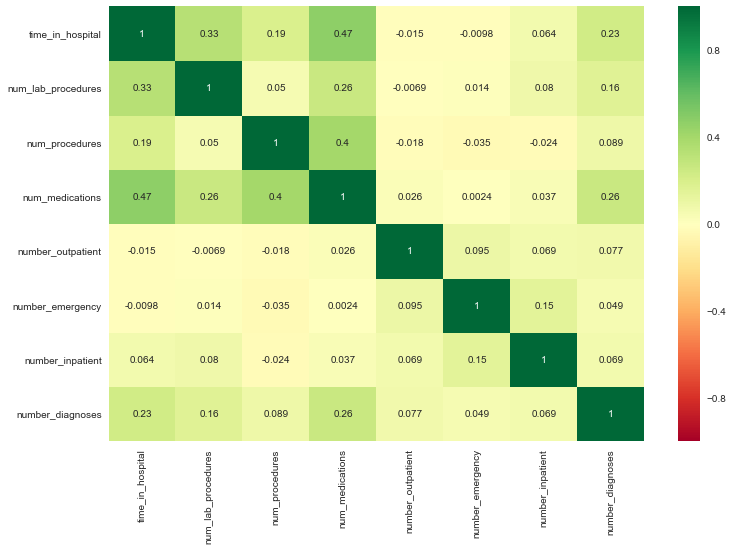

In [14]:
## Check for correlation between numeric attributes

sns.heatmap(dataset.select_dtypes(include = [np.number]).corr(),annot=True,cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(12,8)


No strong correlation between numeric attributes!

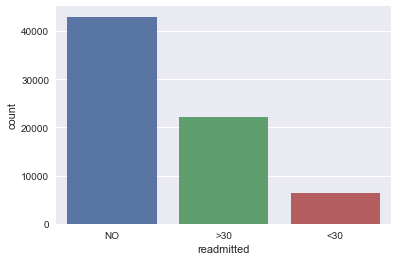

In [15]:
## Show count plot of categorical attributes.

sns.countplot(x='readmitted', data= dataset)

This reveals that the target variable has a imbalance skewed toward No readmission.

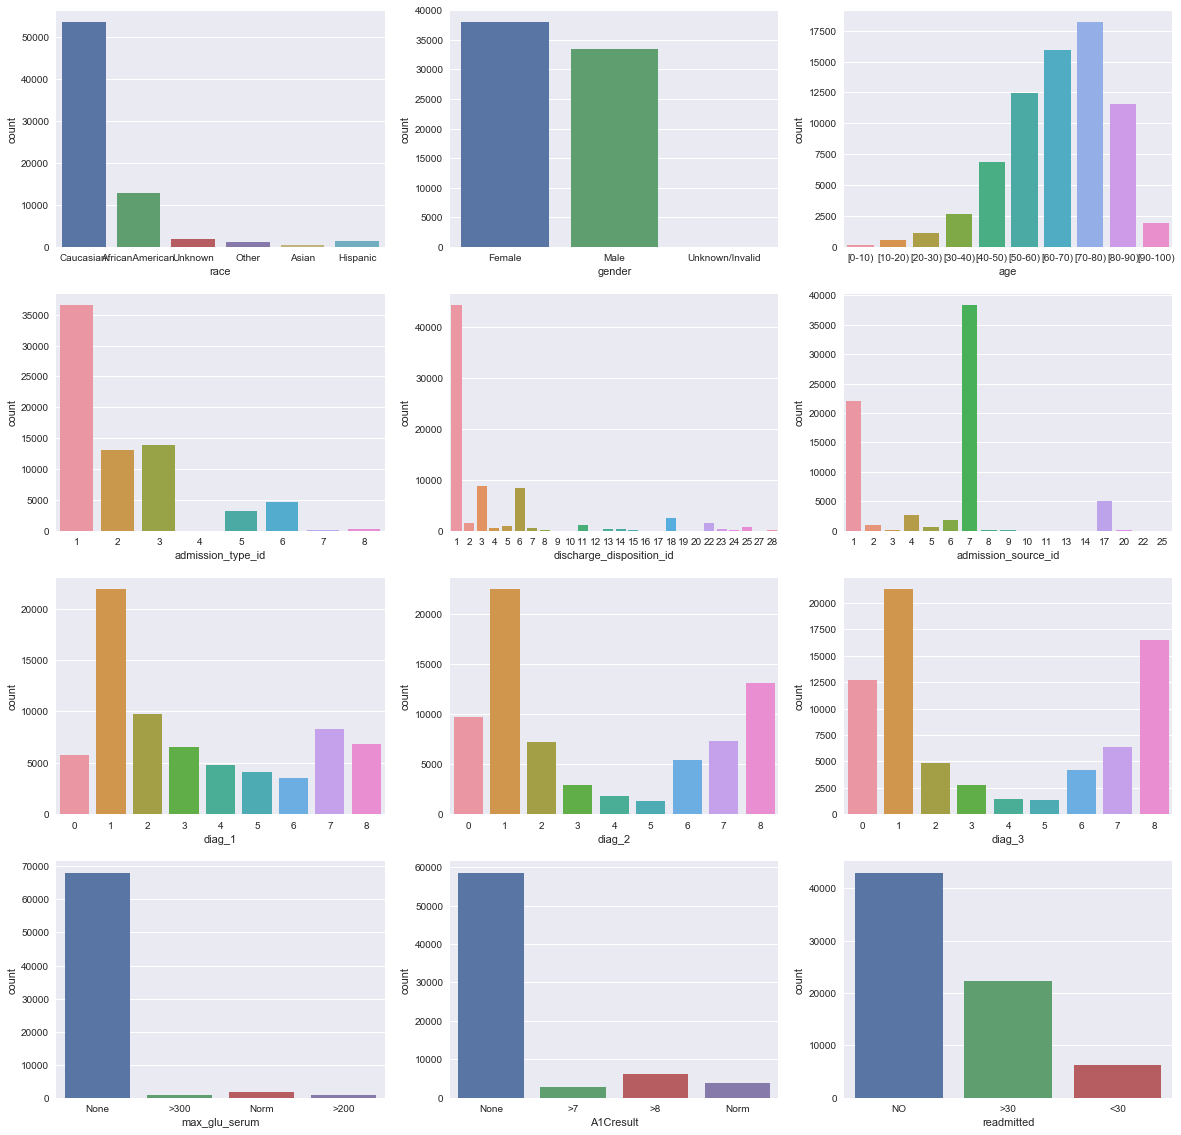

In [16]:
## Plot count plot of 

attribs = ['race', 'gender', 'age', 'admission_type_id','discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2','diag_3', 'max_glu_serum', 'A1Cresult','readmitted']
fig, ax = plt.subplots(nrows=4, ncols=3, figsize = [20,20])
for i,j in enumerate(attribs):
    sns.countplot(x = j, data = dataset, ax = ax[i//3][i%3])

#### Step 3: Pattern Mining Analysis

Here, we attempt to perform pattern mining to find hidden patterns related to drugs administered and readmission.

In [105]:
from collections import defaultdict, namedtuple
from itertools import chain,combinations
import itertools
import time

In [100]:
## Remove patients without diabetes diagnoses
diab = dataset[(dataset['diag_1'] == 0) | (dataset['diag_2'] == 0) | (dataset['diag_3'] == 0)]

In [108]:
## Implementing the FP-Growth algorithm
class FPNode(object):
    '''
    Implements a node of the FP tree
    '''

    def __init__(self, value, count, parent):
        """
        Initializes the node.
        """
        self.value = value
        self.count = count
        self.parent = parent
        self.link = None
        self.children = []

    def has_child(self, value):
        """
        Checks if the node has children
        """
        for node in self.children:
            if node.value == value:
                return True

        return False

    def get_child(self, value):
        """
        Return a child node with a particular value.
        """
        for node in self.children:
            if node.value == value:
                return node

        return None

    def add_child(self, value):
        """
        Add a node as a child node.
        """
        child = FPNode(value, 1, self)
        self.children.append(child)
        return child


class FPTree(object):
    """
    A frequent pattern tree.
    """

    def __init__(self, transactions, threshold, root_value, root_count):
        """
        Initialize the tree.
        """
        self.frequent = self.find_frequent_items(transactions, threshold)
        self.headers = self.build_header_table(self.frequent)
        self.root = self.build_fptree(
            transactions, root_value,
            root_count, self.frequent, self.headers)

    @staticmethod
    def find_frequent_items(transactions, threshold):
        """
        Create a dictionary of items with occurrences above the threshold.
        """
        items = {}

        for transaction in transactions:
            for item in transaction:
                if item in items:
                    items[item] += 1
                else:
                    items[item] = 1

        for key in list(items.keys()):
            if items[key] < threshold:
                del items[key]

        return items

    @staticmethod
    def build_header_table(frequent):
        """
        Build the header table.
        """
        headers = {}
        for key in frequent.keys():
            headers[key] = None

        return headers

    def build_fptree(self, transactions, root_value,
                     root_count, frequent, headers):
        """
        Build the FP tree and return the root node.
        """
        root = FPNode(root_value, root_count, None)

        for transaction in transactions:
            sorted_items = [x for x in transaction if x in frequent]
            sorted_items.sort(key=lambda x: frequent[x], reverse=True)
            if len(sorted_items) > 0:
                self.insert_tree(sorted_items, root, headers)

        return root

    def insert_tree(self, items, node, headers):
        """
        Recursively grow FP tree.
        """
        first = items[0]
        child = node.get_child(first)
        if child is not None:
            child.count += 1
        else:
            # Add new child.
            child = node.add_child(first)

            # Link it to header structure.
            if headers[first] is None:
                headers[first] = child
            else:
                current = headers[first]
                while current.link is not None:
                    current = current.link
                current.link = child

        # Call function recursively.
        remaining_items = items[1:]
        if len(remaining_items) > 0:
            self.insert_tree(remaining_items, child, headers)

    def tree_has_single_path(self, node):
        """
        If there is a single path in the tree,
        return True, else return False.
        """
        num_children = len(node.children)
        if num_children > 1:
            return False
        elif num_children == 0:
            return True
        else:
            return True and self.tree_has_single_path(node.children[0])

    def mine_patterns(self, threshold):
        """
        Mine the constructed FP tree for frequent patterns.
        """
        if self.tree_has_single_path(self.root):
            return self.generate_pattern_list()
        else:
            return self.zip_patterns(self.mine_sub_trees(threshold))

    def zip_patterns(self, patterns):
        """
        Append suffix to patterns in dictionary if
        we are in a conditional FP tree.
        """
        suffix = self.root.value

        if suffix is not None:
            # We are in a conditional tree.
            new_patterns = {}
            for key in patterns.keys():
                new_patterns[tuple(sorted(list(key) + [suffix]))] = patterns[key]

            return new_patterns

        return patterns

    def generate_pattern_list(self):
        """
        Generate a list of patterns with support counts.
        """
        patterns = {}
        items = self.frequent.keys()

        # If we are in a conditional tree,
        # the suffix is a pattern on its own.
        if self.root.value is None:
            suffix_value = []
        else:
            suffix_value = [self.root.value]
            patterns[tuple(suffix_value)] = self.root.count

        for i in range(1, len(items) + 1):
            for subset in itertools.combinations(items, i):
                pattern = tuple(sorted(list(subset) + suffix_value))
                patterns[pattern] = \
                    min([self.frequent[x] for x in subset])

        return patterns

    def mine_sub_trees(self, threshold):
        """
        Generate subtrees and mine them for patterns.
        """
        patterns = {}
        mining_order = sorted(self.frequent.keys(),
                              key=lambda x: self.frequent[x])

        # Get items in tree in reverse order of occurrences.
        for item in mining_order:
            suffixes = []
            conditional_tree_input = []
            node = self.headers[item]

            # Follow node links to get a list of
            # all occurrences of a certain item.
            while node is not None:
                suffixes.append(node)
                node = node.link

            # For each occurrence of the item, 
            # trace the path back to the root node.
            for suffix in suffixes:
                frequency = suffix.count
                path = []
                parent = suffix.parent

                while parent.parent is not None:
                    path.append(parent.value)
                    parent = parent.parent

                for i in range(frequency):
                    conditional_tree_input.append(path)

            # Now we have the input for a subtree,
            # so construct it and grab the patterns.
            subtree = FPTree(conditional_tree_input, threshold,
                             item, self.frequent[item])
            subtree_patterns = subtree.mine_patterns(threshold)

            # Insert subtree patterns into main patterns dictionary.
            for pattern in subtree_patterns.keys():
                if pattern in patterns:
                    patterns[pattern] += subtree_patterns[pattern]
                else:
                    patterns[pattern] = subtree_patterns[pattern]

        return patterns


def find_frequent_patterns(transactions, min_sup):
    """
    Transactions: As a list of transaction sets
    min_sup: Absolute minimum support 
    """
    
    #starttime = time.time()
    support_threshold =  min_sup * len(transactions)
    tree = FPTree(transactions, support_threshold, None, None)
    
    result = tree.mine_patterns(support_threshold)
    freqitems = set([])
    resultdict = {}
    for itemset, values in result.items():
        freqitems.add(frozenset(itemset))
        #resultdict[freqitems.add(frozenset(itemset))] = values
        
    return freqitems


def getffrequentassociations(frequentset, frequentsetcounters, minconf, numoftrans):
    '''
    frequentset: Set of frequent items from which rules are to be obtained.
    frequentsetcounters: Set of frequent items with their support count.
    minconf: minumum confidence which must hold for a rule to be frequent.
    numoftrans: number of transactions which is being mined.
    '''
    def getsupport(item):
        '''
        item: Item in frequent itemset whose minimums support is to be determined.
        Returns float value of support value.
        '''
        #if len(item) == 1:
        #    item = frozenset([list(item)[0]])
        return float(frequentsetcounters[item])/numoftrans
    
    frequentrules = []
    for freqitem in frequentset:
        #Get Subsets for frequent item
        subs = subsets(freqitem)
        for element in subs:
            rem = freqitem.difference(element)
            if len(rem) > 0:
                if getsupport(element) == 0:
                    conf = 0
                    lift = 0
                else:
                    conf = getsupport(freqitem)/getsupport(element)
                    support = getsupport(freqitem)
                    if getsupport(frozenset(rem)) == 0:
                        lift = 0
                    else:
                        lift = conf/getsupport(frozenset(rem))
                if conf >= minconf:
                    frequentrules.append(((tuple(element), tuple(rem)),conf,support,lift))    
    #return sorted(frequentrules, reverse=True, key = lambda rule, conf, sup: sup)
    return frequentrules

In [109]:
def gettransactionset(data):
    '''
    Converts dataframe into set of items.
    '''
    tranlist = []
    for i in data.index:
        itemset = []
        for k,v in dict(data.loc[i]).items():
            if isinstance(v, str) or not np.isnan(v): #Handle missing values
                itemset.append(k + ' - ' + str(v))
        tranlist.append(frozenset(itemset))
    return tranlist


In [101]:
## Using a minimum support of 0.1% obtain all frequent patterns
minsup = 0.001
transactionset = gettransactionset(diab)
#patterns = find_frequent_patterns(transactionset, 0.01)

In [107]:
patterns = find_frequent_patterns(transactionset, minsup)

In [ ]:
## Selecting the demographic elements gender, age & sex
demographics = gettransactionset(diab[['gender', 'age', 'race']])
l = []
for i in demographics:
    for j in i:
        l.append(j)
demographics = set(l)

In [ ]:
## Recode the readmission status
readmit = set(['readmitted - ' + str(i) for i in pd.unique(assoc_diab['readmitted'])])

In [ ]:
## Obtain set of drugs used!
drugs = gettransactionset(assoc_diab.drop(['gender', 'age', 'race', 'readmitted'], axis = 1))
l = []
for i in drugs:
    for j in i:
        l.append(j)
drugs = set(l)

In [ ]:
## Get the rules which can be considered:
List = []
for i in patterns:    
    if i.intersection(demographics) != set([]):
        if i.intersection(drugs) != set({}):
            if i.intersection(readmit) != set({}):
                List.append(i)

In [ ]:
transactionset = gettransactionset(assoc_diab)

ll = []
for i in list(patterns):
    ll = ll + subsets(i)
    
ll = set(ll)


In [ ]:
## Get support count for all possible subset of the dataset

trandict = defaultdict(int)
for i in ll:
    for transaction in transactionset:
        if i.issubset(transaction):
            trandict[i] += 1
trandict = dict(trandict)

In [ ]:
## Get list of associations

associations = getffrequentassociations(s, trandict, 0.5, len(assoc_diab))

In [ ]:
## To validate each of the rules
def stratifyrules(rulelist):
    '''
    removes uninteresting rules based on the rules of thumb:
        1. Lift greater than 1
        2. Rule has a component for readmission, demographios and drugs applied
        
    returns: List of rules.
    '''
    rulesd = {}
    for rule in rulelist:
        if rule[3] > 1:
            if checkrule(set(rule[0][0])):
                if set(rule[0][1]).issubset(readmit):
                    rulesd[str(rule[0][0]) + '=>' + str(rule[0][1])] = [rule[1], rule[2], rule[3]]
    
    return rulesd

In [ ]:
final = stratifyrules(associations)

In [ ]:
result = pd.DataFrame(final, index=['Confidence', 'Support', 'Lift'])
result = result.T
result.sort_values('Confidence', ascending=False)

#### Step 4: Predictive Analysis

We would attempt to use the following algorithms from the Scikit Learn Library:
* Gaussian Naive Bayes
* Decision Tree
* Random Forest


In [86]:
## Import the required libraries
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score

In [22]:
##  Encode Non Numeric Variables

X = dataset.drop('readmitted', axis =1)
y = dataset['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

le = LabelEncoder()

for i,j in dict(X.dtypes).items():
    if str(j) == 'object':
        X[i] = le.fit_transform(X[i])
        

In [71]:
##  For Decision Tree Model
##  Using K-Fold Cross Validation and Parameter tuning to obtain the best parameters
##  Using Gini Index we would attempt to tune the max features and Criterion via a brute force approach

max_features = ['auto', 'sqrt', 'log2']
max_depth = range(1,16)
results = {}

kfoldcv = StratifiedKFold(n_splits=5, random_state=1)

for i in max_features:
    for j in max_depth:
        clf = DecisionTreeClassifier(max_depth=j, max_features=i)
        #print (i,j)
        scores = []
        
        for k, (train, test) in enumerate(kfoldcv.split(X,y)):
            clf.fit(X.iloc[train], y.iloc[train])
            #f1score = clf.score(X.iloc[test], y.iloc[test])
            f1score = f1_score(clf.predict(X.iloc[test]), y.iloc[test])
            scores.append(f1score)
        
        results[(i,j)] = np.mean(scores)

In [73]:
## Best F1 score from the parameter tuning is:

sorted(results.items(), key = lambda (k,v): v, reverse = True)[0]

(('auto', 15), 0.058727881429893006)

In [47]:
## Get the feature importances based on this

DecisonTreeclf = DecisionTreeClassifier(max_features='auto', max_depth=15)
DecisonTreeclf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [49]:
## Top 10 Most Important Features
sorted(zip(DecisonTreeclf.feature_importances_, X.columns), key = lambda x: x[0], reverse = True)[:10]

[(0.10095585735462261, 'num_lab_procedures'),
 (0.096728986526426183, 'discharge_disposition_id'),
 (0.082394897411741913, 'num_medications'),
 (0.072273390179128608, 'number_inpatient'),
 (0.064483606725068768, 'time_in_hospital'),
 (0.054204579793483303, 'diag_1'),
 (0.049105413328004568, 'age'),
 (0.048468829215930473, 'diag_2'),
 (0.045943541916412561, 'number_diagnoses'),
 (0.041178454850258561, 'diag_3')]

In [63]:
## Using Random Forest Classifier

##max_features = ['auto', 'sqrt', 'log2']
max_depth = range(1,10)
n_estimators = [50, 100, 300, 500]

results = {}

## Using K-Fold Cross Validation with 5 Folds
kfoldcv = StratifiedKFold(n_splits=5, random_state=1)

for i in n_estimators:
    for j in max_depth:
        clf = RandomForestClassifier(max_depth=j, n_estimators=i)
        ##print (i,j)
        scores = []
        
        for k, (train, test) in enumerate(kfoldcv.split(X,y)):
            clf.fit(X.iloc[train], y.iloc[train])
            f1score = f1_score(clf.predict(X.iloc[test]), y.iloc[test], average='weighted')
            scores.append(f1score)
        
        results[(i,j)] = np.mean(scores)

(50, 1)


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(50, 2)
(50, 3)
(50, 4)
(50, 5)
(50, 6)
(50, 7)
(50, 8)
(50, 9)
(100, 1)
(100, 2)
(100, 3)
(100, 4)
(100, 5)
(100, 6)
(100, 7)
(100, 8)
(100, 9)
(300, 1)
(300, 2)
(300, 3)
(300, 4)
(300, 5)
(300, 6)
(300, 7)
(300, 8)
(300, 9)
(500, 1)
(500, 2)
(500, 3)
(500, 4)
(500, 5)
(500, 6)
(500, 7)
(500, 8)
(500, 9)


In [77]:
sorted(results.items(), key = lambda (k,v): v, reverse = True)[0]

[(('auto', 15), 0.058727881429893006),
 (('sqrt', 15), 0.053597205546712899),
 (('log2', 15), 0.051378378954058765),
 (('auto', 14), 0.049008688233550993),
 (('auto', 13), 0.048945881110207298),
 (('sqrt', 14), 0.048190928420151276),
 (('sqrt', 13), 0.044796370729897894),
 (('log2', 14), 0.044754344371206914),
 (('sqrt', 12), 0.03271227003956563),
 (('log2', 13), 0.03114902806845412),
 (('auto', 12), 0.028508762649423335),
 (('log2', 10), 0.027994305772018113),
 (('log2', 11), 0.027411903070886791),
 (('auto', 11), 0.023280180187924205),
 (('sqrt', 10), 0.021721069721334897),
 (('auto', 10), 0.021428638285386426),
 (('log2', 12), 0.021410468146405147),
 (('sqrt', 9), 0.021271696808536671),
 (('log2', 4), 0.020911537778130353),
 (('sqrt', 8), 0.018728756420656252),
 (('sqrt', 11), 0.018719990088468908),
 (('auto', 9), 0.01548153128460018),
 (('log2', 9), 0.01423846481570247),
 (('auto', 7), 0.012232377148239527),
 (('sqrt', 7), 0.010211758973205729),
 (('sqrt', 4), 0.010128965045077383)

In [59]:
RandomForestClf = RandomForestClassifier(n_estimators=300, max_depth=5)

In [62]:
RandomForestClf.fit(X,y)
f1_score(y, RandomForestClf.predict(X), average='weighted')

0.87003696880672221

In [111]:
RandomForestClf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [112]:
## view top 10 features based on the feature importance of the model
sorted(zip(RandomForestClf.feature_importances_, X.columns), key = lambda x: x[0], reverse = True){0:10}

[(0.29559896952491083, 'number_inpatient'),
 (0.26200336644178535, 'discharge_disposition_id'),
 (0.11158231137140362, 'time_in_hospital'),
 (0.066085650835940882, 'age'),
 (0.056839890287812833, 'num_medications'),
 (0.046258715549976008, 'number_diagnoses'),
 (0.039122278952575543, 'number_emergency'),
 (0.02149249180961206, 'diag_1'),
 (0.013732953136690505, 'num_lab_procedures'),
 (0.012338767390704448, 'diabetesMed'),
 (0.0090455167744304555, 'number_outpatient'),
 (0.0076933219690437562, 'diag_2'),
 (0.0065291995222520639, 'repaglinide'),
 (0.0050897439418847402, 'change'),
 (0.0049362773877398023, 'glipizide'),
 (0.0044704086166471651, 'num_procedures'),
 (0.0042681466675468507, 'race'),
 (0.0039075085968881037, 'insulin'),
 (0.0036767353932384002, 'diag_3'),
 (0.0033030365323623561, 'max_glu_serum'),
 (0.0030588202754412604, 'acarbose'),
 (0.0030130832558664614, 'admission_source_id'),
 (0.0029054532316100047, 'glyburide'),
 (0.002282969341220009, 'A1Cresult'),
 (0.002039907724

In [84]:
## Using Gaussian Naive Bayes, No parameters to tune

NaiveBayesClf = GaussianNB()
kfoldcv = StratifiedKFold(n_splits=5, random_state=1)

In [78]:
for (train, test) in (kfoldcv.split(X,y)):
    clf.fit(X.iloc[train], y.iloc[train])
    #score = clf.score(X.iloc[test], y.iloc[test])
    f1score = f1_score(clf.predict(X.iloc[test]), y.iloc[test])
    scores.append(f1score)
        
    result = np.mean(scores)

In [79]:
result

0.051125832659851475

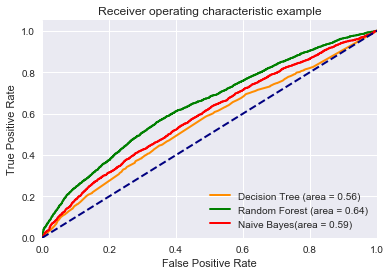

In [89]:
## Plotting the ROC curve for the three modes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_score = DecisonTreeclf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:,1])
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Decision Tree (area = %0.2f)' % roc_auc_score(y_test, y_score[:,1]))

y_score = RandomForestClf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:,1])
plt.plot(fpr, tpr, color='green',
         lw=lw, label='Random Forest (area = %0.2f)' % roc_auc_score(y_test, y_score[:,1]))

y_score = NaiveBayesClf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:,1])
plt.plot(fpr, tpr, color='red',
         lw=lw, label='Naive Bayes(area = %0.2f)' % roc_auc_score(y_test, y_score[:,1]))


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")


Another approach is to resolve the class imbalance using a simple oversampling.

In [33]:
def resolveclassimbalance(X,y):
    '''
    Use naive random undersampling to balance the class imbalance of the dataset
    X - training attributes
    y - target attribute
    
    Returns: Balanced dataset
    '''
    positive = X[y == 1]
    negative = X[y == 0].sample(frac = 1).iloc[0:len(positive)]
    
    return pd.concat([positive, negative]) , pd.concat([y[y == 1], y[y == 0][: len(positive)]])
    

In [90]:
## For Decision Tree
max_features = ['auto', 'sqrt', 'log2']
max_depth = range(1,16)
results = {}

kfoldcv = StratifiedKFold(n_splits=5, random_state=1)

for i in max_features:
    for j in max_depth:
        clf = DecisionTreeClassifier(max_depth=j, max_features=i)
        #print (i,j)
        scores = []
        
        for k, (train, test) in enumerate(kfoldcv.split(X,y)):
            X_train, y_train = resolveclassimbalance(X.iloc[train], y.iloc[train])
            X_test, y_test = resolveclassimbalance(X.iloc[test], y.iloc[test])
            clf.fit(X_train, y_train)
            accuracy = clf.score(X_test, y_test)
            #f1score = f1_score(clf.predict(X.iloc[test]), y.iloc[test], average='weighted')
            scores.append(accuracy)
        
        results[(i,j)] = np.mean(scores)

In [92]:
## Best Parameters set using this classifier 
sorted(results.items(), key = lambda (k,v): v, reverse = True)[0]

(('auto', 6), 0.5750799016556154)

In [93]:
## Naive Bayes

NaiveBayesClf = GaussianNB()
kfoldcv = StratifiedKFold(n_splits=5, random_state=1)

for (train, test) in (kfoldcv.split(X,y)):
    X_train, y_train = resolveclassimbalance(X.iloc[train], y.iloc[train])
    X_test, y_test = resolveclassimbalance(X.iloc[test], y.iloc[test])
    NaiveBayesClf.fit(X_train, y_train)
    accuracy = NaiveBayesClf.score(X_test, y_test)
    scores.append(accuracy)
        
    result = np.mean(scores)

In [94]:
result

0.53058683362145498

In [95]:
## For Random Forest

max_depth = range(1,10)
n_estimators = [50, 100, 300, 500]

results = {}

## Using K-Fold Cross Validation with 5 Folds
kfoldcv = StratifiedKFold(n_splits=5, random_state=1)

for i in n_estimators:
    for j in max_depth:
        clf = RandomForestClassifier(max_depth=j, n_estimators=i)
        ##print (i,j)
        scores = []
        
        for k, (train, test) in enumerate(kfoldcv.split(X,y)):
            X_train, y_train = resolveclassimbalance(X.iloc[train], y.iloc[train])
            X_test, y_test = resolveclassimbalance(X.iloc[test], y.iloc[test])
            clf.fit(X_train, y_train)
            accuracy = clf.score(X_test, y_test)
            #f1score = f1_score(clf.predict(X.iloc[test]), y.iloc[test], average='weighted')
            scores.append(accuracy)
        
        results[(i,j)] = np.mean(scores)

In [97]:
sorted(results.items(), key = lambda (k,v): v, reverse = True)[0]

((500, 9), 0.6012204654310902)